<a href="https://colab.research.google.com/github/psukphranee/Python-Practice/blob/master/SAR_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

## Plot LFM Pulse for a visual.


This section goes through the rundown of generating an LFM pulse. We define and visualize the pulse envelope and chirp separately. Then we combine them by multiplying them together.

### $P(t) = \chi_{\tau}(t) e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$. (cite Cheney Here)

$\chi_{\tau}(t)$ piecewise function describing pulse envelope

$f_c$ = carrier frequency

$k$ = chirp rate


### Pulse Envelope Characteristic Function

Function describes envelope that LFM is "wrapped" in.

$
\chi_{\tau}(t)=
    \begin{cases}
        A & \text{if } t \in [0, \tau]\\
        0 & otherwise
    \end{cases}
$

We can achive the rectangular profile of $\chi$ by first considering the function $y = \left|\frac{1}{\tau_{.5}} t \right|$, giving us two lines intersecting $(\tau_{.5}, \pm1)$. The result is then booleanized giving us a rectangle of height $1$ and width $\tau := 2 \tau_{.5}$. We can then transform this rectangle by scaling and translating however we'd like.

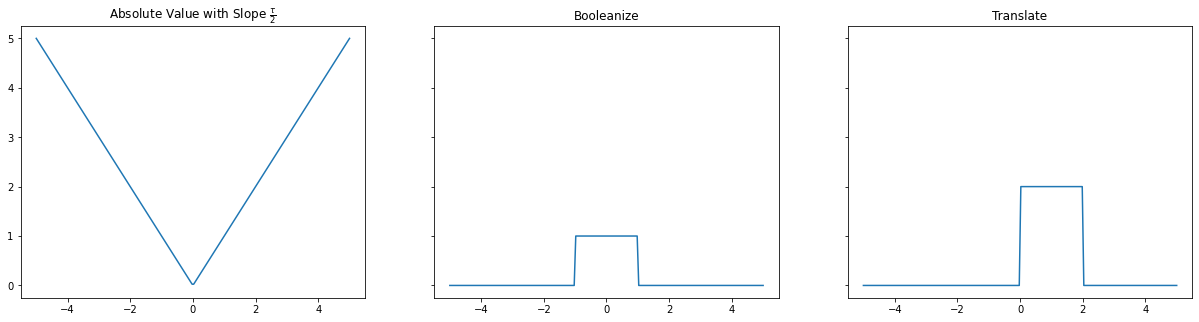

In [123]:
#Characteristic function, chi

# define pulse width tau and pulse height A
A = 2;
tau = 2; 
tau_half = tau/2;

#time
t = np.linspace(-5, 5, 200);
#pulse envelope
pre_chi_0 = np.abs((t)/tau_half);           #step 1
pre_chi_1 = np.abs((t)/tau_half) <= 1;      #step 2
chi = A * (np.abs((t-tau_half)/tau_half) <= 1);   #step 3

fig, ax = plt.subplots(1, 3, figsize=(21,5), sharey=True)
ax[0].plot(t, pre_chi_0)
ax[0].set_title(r'Absolute Value with Slope $\frac{\tau}{2}$')
ax[1].plot(t, pre_chi_1)
ax[1].set_title("Booleanize")
ax[2].plot(t, chi)
ax[2].set_title("Translate")

plt.show()

### LFM Signal

Dummy values used for visuals. Real and Imaginary part plotted.

### $e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$.

$k = \frac{B}{\tau}$ ( $B$ bandwidth ).


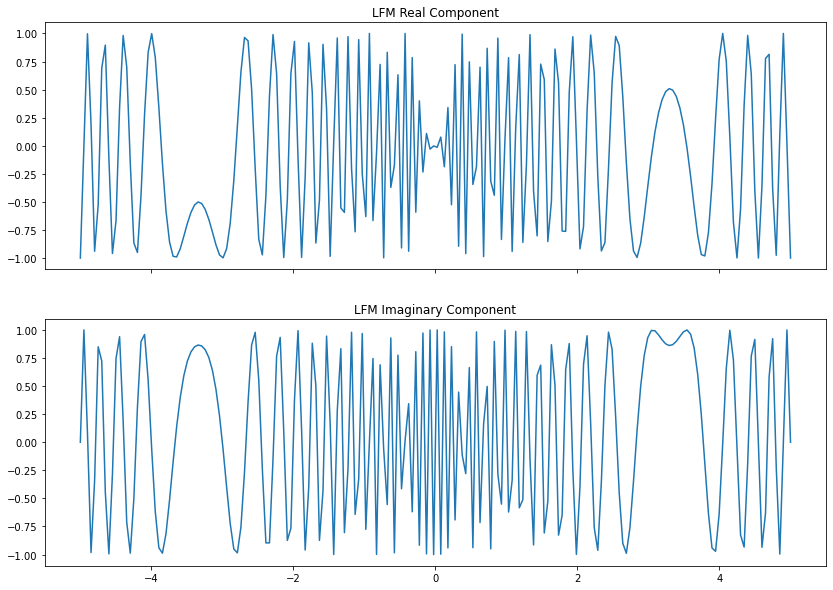

In [147]:
#LFM

#chirp rate
k = 3 
#carrier frequency
f_c = 10
#time intervals to be plotted along abscissa
t = np.linspace(-5, 5, 200) 
#argument to be passed to exponenetial 
exp_arg = 2j*np.pi*(f_c*t + .5*k*(t**2))
LFM = np.exp(exp_arg);

fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
ax[0].plot(t, np.real(LFM))
ax[1].plot(t, np.imag(LFM))

ax[0].set_title("LFM Real Component")
ax[1].set_title("LFM Imaginary Component")
plt.show()

### LFM Pulse

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


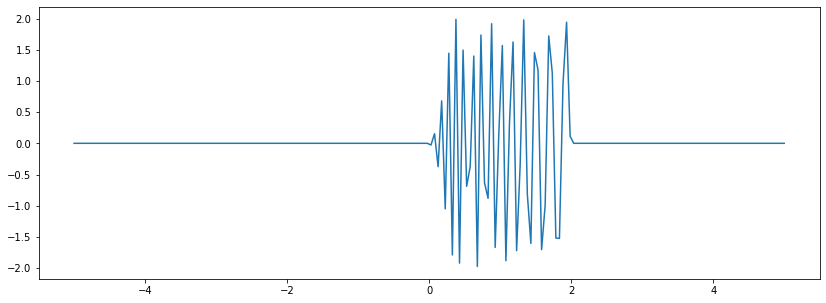

In [151]:
pulse = chi*LFM # multiplication of two previously pre-processed outputs

plt.figure(figsize=(14,5))
plt.plot(t, pulse)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


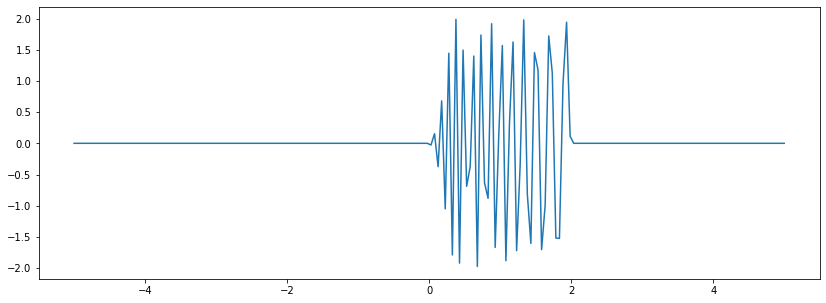

In [152]:
pulse = (A * (np.abs((t-tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*t + .5*k*(t**2)))) #pulse function P_tau(t)

plt.figure(figsize=(14,5))
plt.plot(t, pulse)
plt.show()

## Geometry

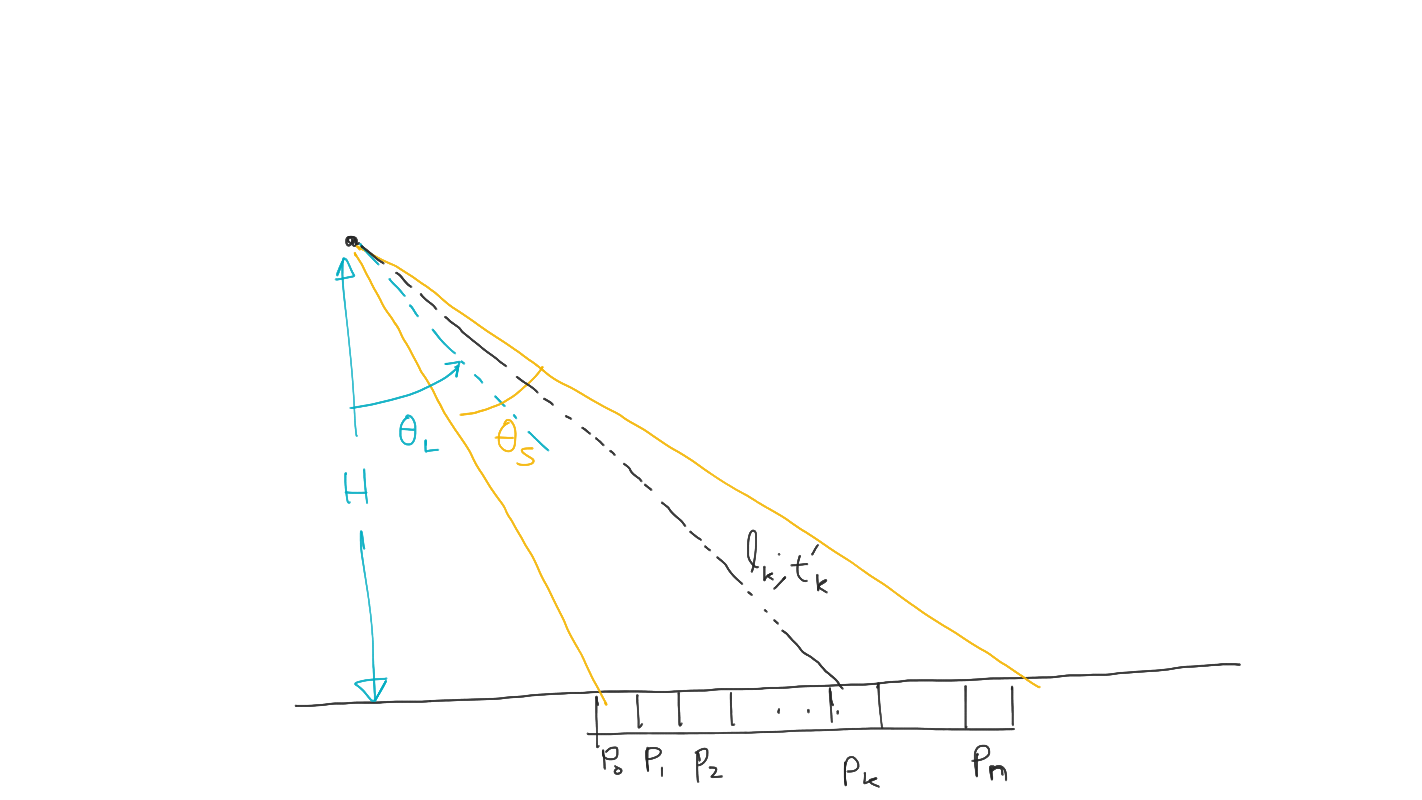

In [2]:
from IPython.display import Image
Image(filename="drive/MyDrive/Colab Notebooks/sar.png")

In [149]:
#define some dummy values first
c_0 = 100 #supposed to be speed of light, but dummy values for now

#angles
theta_L = np.pi/2 #Look angle
theta_S = np.pi/12 #swatch angle. 3dB angle of sinc function

#calculated values from angles
theta_S_half = theta_S/2;
theta_lower = theta_L - theta_S_half;
theta_upper = theta_L + theta_S_half;

#height
H = 100

#step blocks
n = 10 #number of divisions p_k

#array of values corresponding to each subinterval
theta = np.linspace(theta_lower, theta_upper, n)
d = H*theta
t_delay = d/c_0

In [150]:
display(theta, d, t_delay)

array([1.43989663, 1.46898545, 1.49807427, 1.5271631 , 1.55625192,
       1.58534074, 1.61442956, 1.64351838, 1.6726072 , 1.70169602])

array([143.98966329, 146.89854538, 149.80742746, 152.71630955,
       155.62519164, 158.53407372, 161.44295581, 164.3518379 ,
       167.26071998, 170.16960207])

array([1.43989663, 1.46898545, 1.49807427, 1.5271631 , 1.55625192,
       1.58534074, 1.61442956, 1.64351838, 1.6726072 , 1.70169602])

Plot time delayed signals separately than superimposed

In [236]:
t = np.linspace(-1, 5, 500)

time_matrix = np.zeros((3, t.shape[0])) #matrix to store times and their delays

time_matrix[0, :] = t-t_delay[0]
time_matrix[1, :] = t-t_delay[1]
time_matrix[2, :] = t-t_delay[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


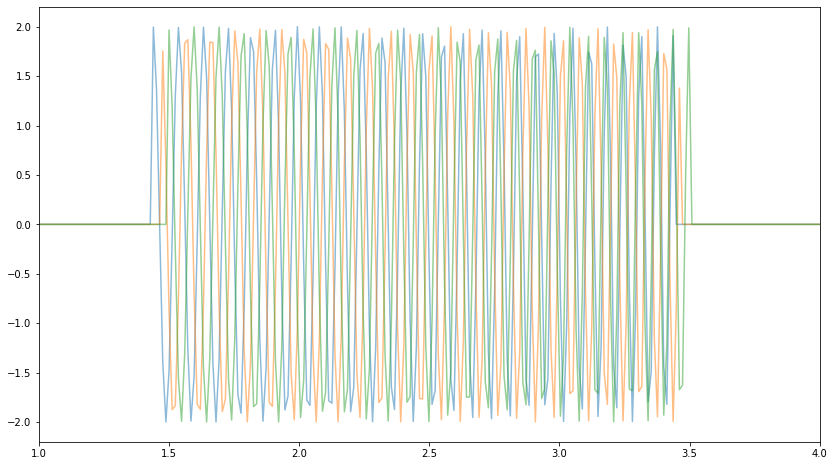

In [261]:
#reuse time variable t from previous cell
pulse = np.zeros((3, t.shape[0]))

pulse[0] = (A * (np.abs((time_matrix[0,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[0,:]  + .5*k*(time_matrix[0,:] **2)))) #pulse function P_tau(t)
pulse[1] = (A * (np.abs((time_matrix[1,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[1,:]  + .5*k*(time_matrix[1,:] **2)))) #pulse function P_tau(t)
pulse[2] = (A * (np.abs((time_matrix[2,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[2,:]  + .5*k*(time_matrix[2,:] **2)))) #pulse function P_tau(t)

plt.figure(figsize=(14,8))
plt.plot(t, pulse[0], alpha=0.5)
plt.plot(t, pulse[1], alpha=0.5)
plt.plot(t, pulse[2], alpha=0.5)
plt.xlim([1,4])
plt.show()

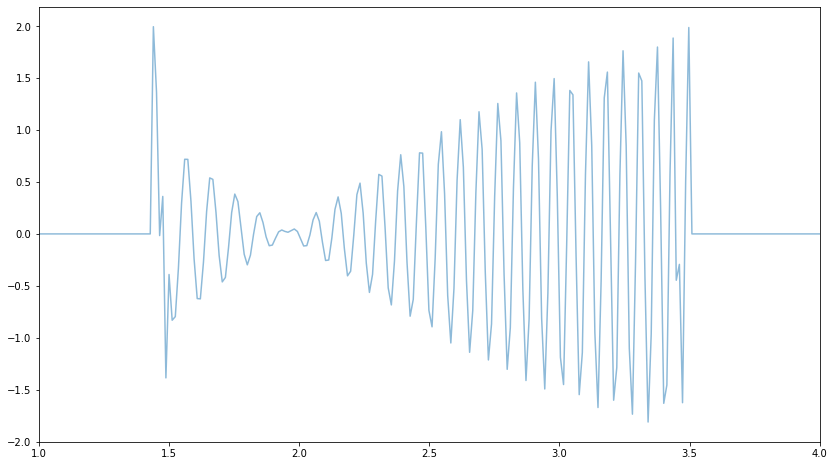

In [262]:
pulse_sum = pulse[0] + pulse[1] + pulse[2]
plt.figure(figsize=(14,8))
plt.plot(t, pulse_sum, alpha=0.5)
plt.xlim([1,4])
plt.show()